# Innere und äußere Zellgrenzen
Bei der Untersuchung von Geweben, Organismen und Organoiden ist oft die Position und Orientierung der Zelle und ihrer Membranen innerhalb des Gewebes relevant. Zum Beispiel unterscheiden wir zwischen apikalen (an einer Spitze, am Ende, äußeren) und basalen (an der Basis, inneren) Seiten von Zellen innerhalb des Gewebes. Ausgehend von einem Zellsegmentierungs-Labelbild können wir Pixel identifizieren, die außerhalb oder innerhalb einer aus Zellen bestehenden Struktur liegen. Im folgenden Beispiel arbeiten wir mit einem synthetischen zweidimensionalen Bild einiger Zellen, die ein Organoid bilden. Die gleichen Funktionen funktionieren auch in 3D.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle

Zuerst erstellen wir unseren synthetischen Datensatz. Er besteht aus 6 Zellzentren, die wir zu einem Organoid erweitert haben.

In [2]:
points = np.asarray([
    [50, 50],
    [60, 60],
    [25, 40],
    [70, 30],
    [35, 65],
    [50, 25]
]).T
image = np.zeros((100, 100))
spots = cle.pointlist_to_labelled_spots(points, image)
cells = cle.dilate_labels(spots, radius=15)
spots.shape

(100, 100)

Dies sind unsere Zellen:

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
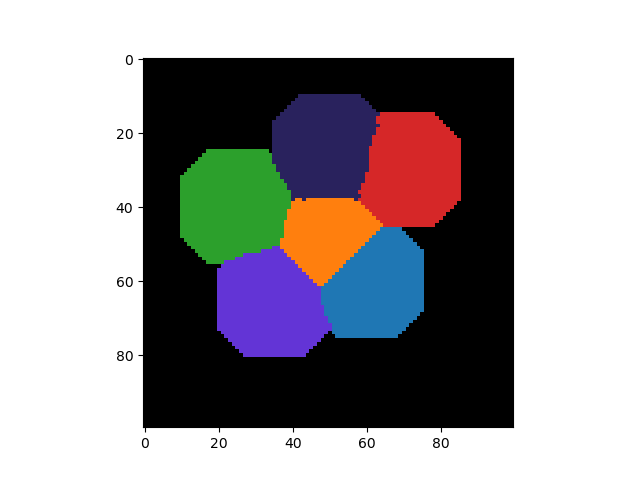

In [3]:
cells

Und das ist das Organoid:

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
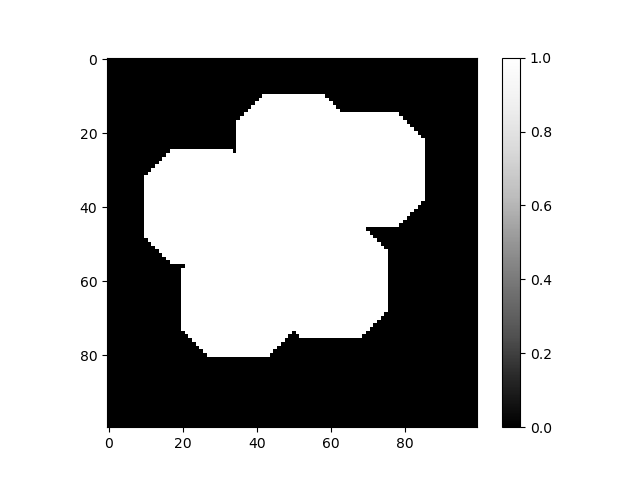
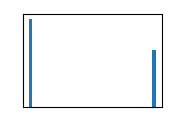

In [4]:
organoid = cells > 0
organoid

Wir identifizieren nun die Pixel, die sich an den Grenzen der Zellen befinden.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
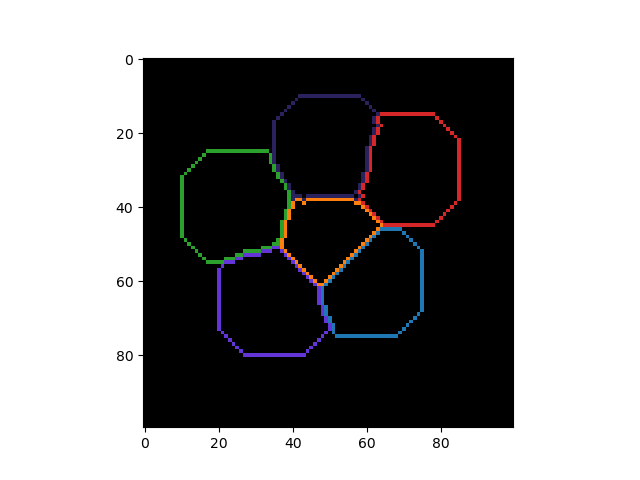

In [5]:
cell_borders = cle.reduce_labels_to_label_edges(cells)
cell_borders

Wir können genau dasselbe mit dem Organoid machen, um die Pixel auf seiner Oberfläche zu identifizieren.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
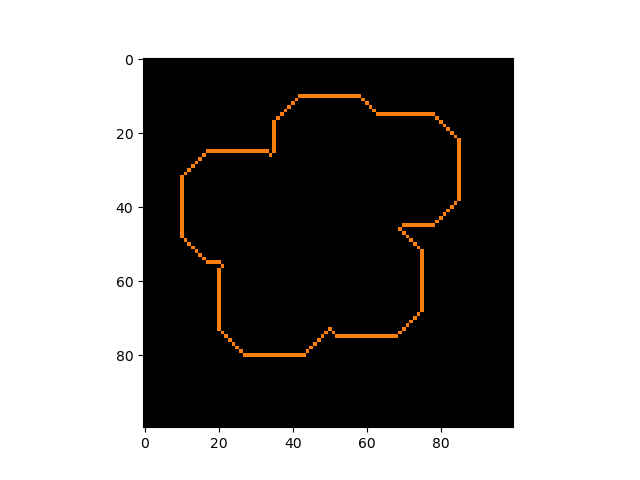

In [6]:
organoid_border = cle.reduce_labels_to_label_edges(organoid)
organoid_border

Indem wir die Zellgrenzen mit der Organoidgrenze maskieren - technisch gesehen ist das eine pixelweise Multiplikation - können wir die äußeren Grenzen identifizieren.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
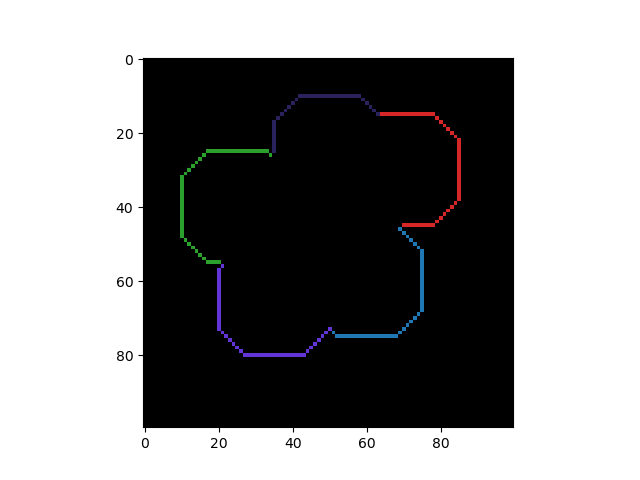

In [7]:
outer_borders = cle.mask(cell_borders, organoid_border).astype(np.uint32)
outer_borders

Wenn wir die äußeren Grenzen von allen Zellgrenzen abziehen, erhalten wir die inneren Grenzen

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
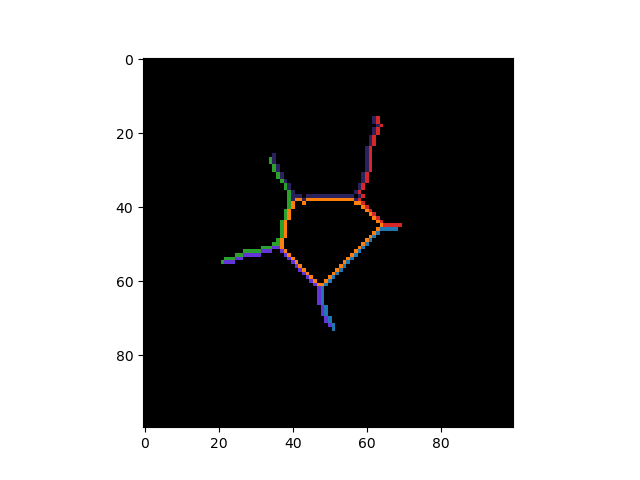

In [8]:
inner_borders = (cell_borders - outer_borders).astype(np.uint32)
inner_borders

Bei der Nachbearbeitung dieser Labelbilder sollten Sie etwas vorsichtig sein, da diese Bilder möglicherweise nicht sequenziell beschriftet sind. Es gibt Bibliotheken und Funktionen, die möglicherweise Probleme mit solchen Labelbildern haben (z.B. `cle.statistics_of_labelled_pixels()`). Sie können die vorhandenen Labels in einem Labelbild mit `np.unique()` ausgeben und die Labelbilder mit `cle.relabel_sequential()` sequenziell machen.

In [9]:
np.unique(outer_borders)

array([0, 2, 3, 4, 5, 6], dtype=uint32)

In [10]:
np.unique(inner_borders)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint32)